In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('dataload.py'))))

import dataload

continents = {}
countries = {}
years = {}
years['min'] = 3000
years['max'] = 0

# Start by loading fixed internet broadband subscriptions per 100 inhabitants 
dataload.loadDataset(continents, countries, years, "../dataset/Fixed_Internet_broadband_Subscriptions_per_100_inhabitants_20170325_164431694_export.csv", 3, 0)

# Load 2nd dataset with mobile cellular telephony subscriptions per 100 inhabitants 
dataload.loadDataset(continents, countries, years, "../dataset/Mobile-cellular_telephone_subscriptions_per_100_inhabitants_20170325_164502263.csv", 2, 1)

# Load 3rd data set with proportion of individuals using the Internet per 100 inhabitants
dataload.loadDataset(continents, countries, years, "../dataset/Proportion_of_individuals_using_the_Internet_20170325_164406087_export.csv", 3, 2)

# identify missing entries and fill in with zeros
dataload.missingEntries(countries, years)

# fill in missing values
dataload.fillMissing(countries, years)

Encountered 197 new countries. Loaded 2368 values - Year min 2000 max 2015
Encountered 8 new countries. Loaded 3891 values - Year min 1990 max 2015
Encountered 4 new countries. Loaded 3002 values - Year min 1990 max 2015
1083 missing years in 154 countries
706 missing values - 170 corrected


Compute annual grow rate for each metric

In [3]:
for country, data in countries.items():
    for slot in range(0,3):
        for year in range(years['min'], years['max']):
            if (data[year][slot] > 0):
                rate = (data[year + 1][slot] - data[year][slot]) / data[year][slot]
                data[year + 1][slot + 3] = rate

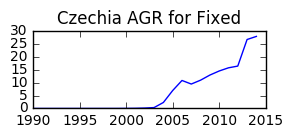

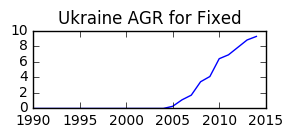

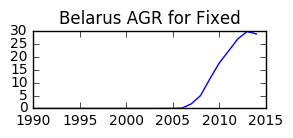

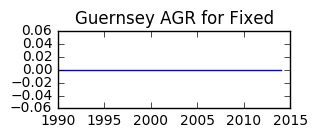

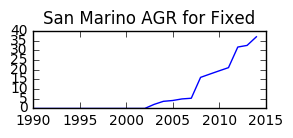

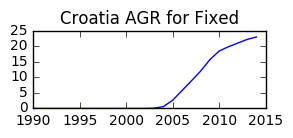

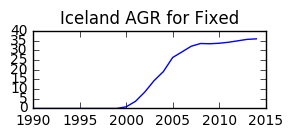

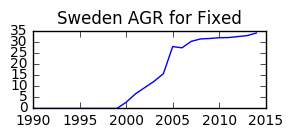

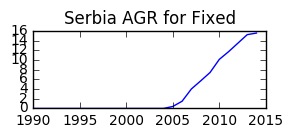

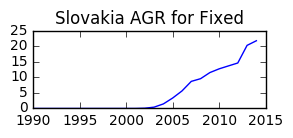

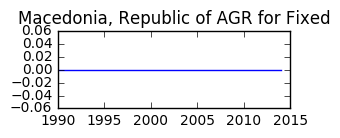

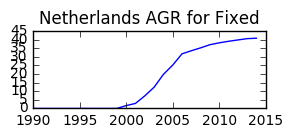

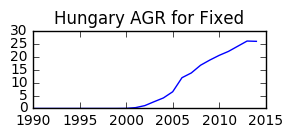

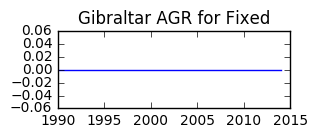

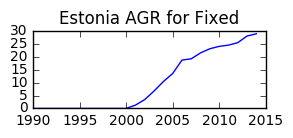

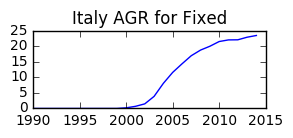

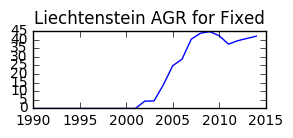

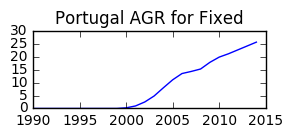

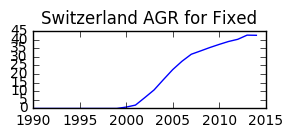

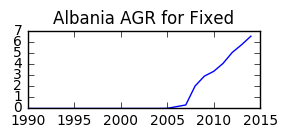

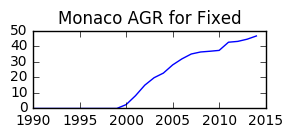

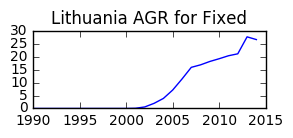

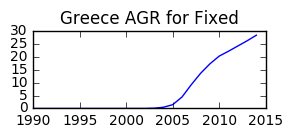

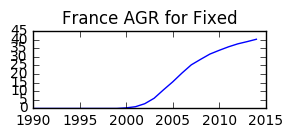

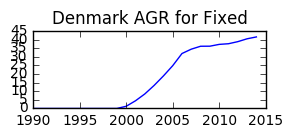

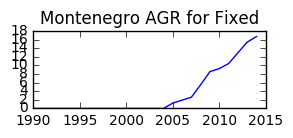

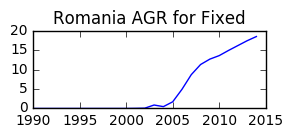

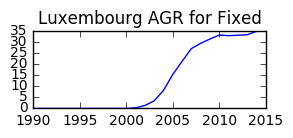

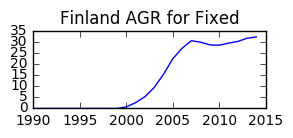

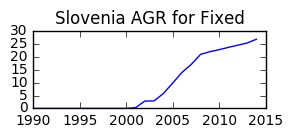

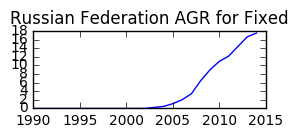

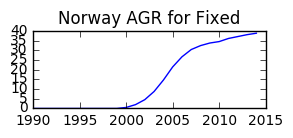

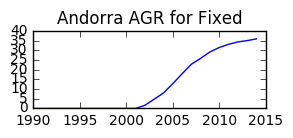

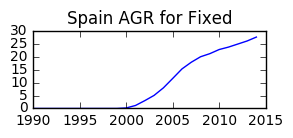

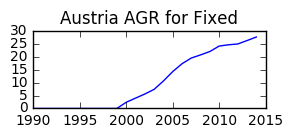

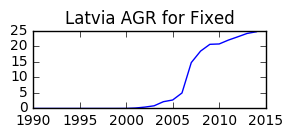

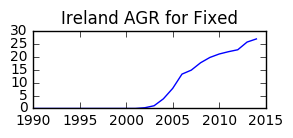

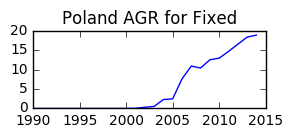

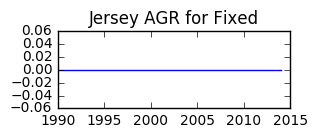

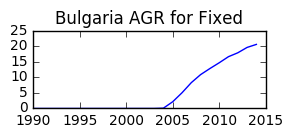

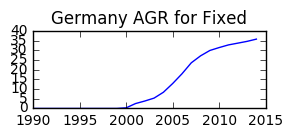

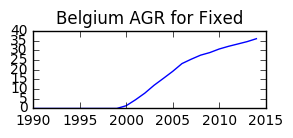

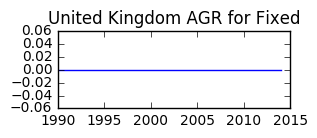

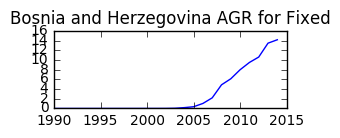

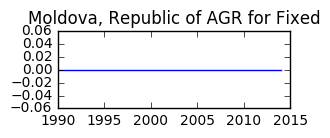

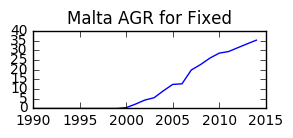

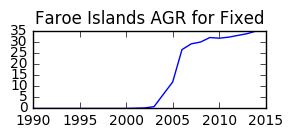

In [72]:
import matplotlib.pyplot as plt
import numpy as np

columnData = 0

countriesPlot = {}

countryData = []
x = np.arange(years['min'], years['max'], 1);
for country in continents['Europe']:
    thisCountryData = []
    thisCountryData.append(country)
    
    y = []
    for year in range(years['min'], years['max']):
        y.append(countries[country][year][columnData])
        thisCountryData.append(countries[country][year][columnData])

    countryData.append(thisCountryData)
        
    countriesPlot[country] = y
        
    plt.figure(figsize=(3,1))
    plt.title(country + " AGR for Fixed")
    plt.plot(x, y)
    plt.show()

In [47]:
totColumns = years['max'] - years['min']

In [66]:
totGroups = 5

In [73]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=totGroups, init='k-means++', random_state=1) # initialization
kmeans.fit([row[1:totColumns] for row in countryData]) # actual execution

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [74]:
c = kmeans.predict([row[1:totColumns] for row in countryData])

In [75]:
mergedata = []
for row in range(0, len(countryData)):
    line = []
    for data in countryData[row]:
        line.append(data)
    line.append(c[row])
    mergedata.append(line)

In [76]:
for group in range(0,totGroups):
    print("== Group", group, "================================")
    for name in [row for row in mergedata if row[totColumns+1]==group]:
        print(name[0])

== Group 0 ================================
Czechia
Belarus
Croatia
Serbia
Slovakia
Montenegro
Romania
Russian Federation
Poland
Bulgaria
Bosnia and Herzegovina
== Group 1 ================================
Iceland
Sweden
Netherlands
Liechtenstein
Switzerland
Monaco
Denmark
Norway
== Group 2 ================================
Ukraine
Guernsey
Macedonia, Republic of
Gibraltar
Albania
Jersey
United Kingdom
Moldova, Republic of
== Group 3 ================================
France
Luxembourg
Finland
Andorra
Germany
Belgium
Malta
Faroe Islands
== Group 4 ================================
San Marino
Hungary
Estonia
Italy
Portugal
Lithuania
Greece
Slovenia
Spain
Austria
Latvia
Ireland


== Group 0 ================================


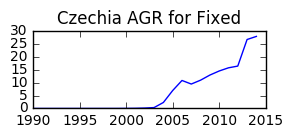

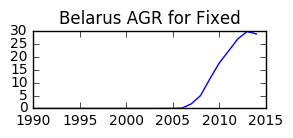

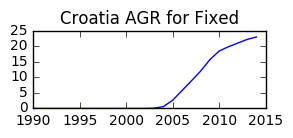

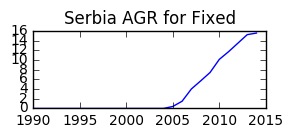

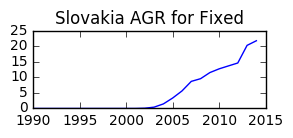

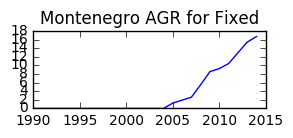

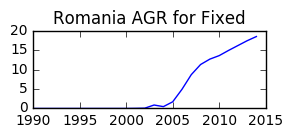

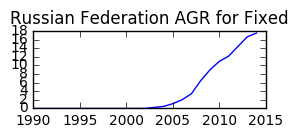

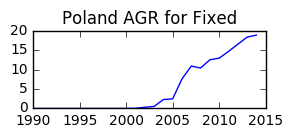

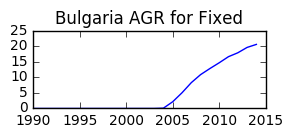

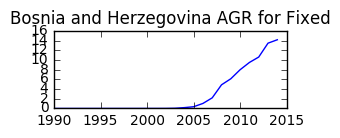

== Group 1 ================================


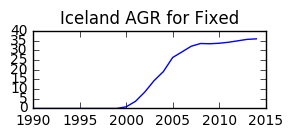

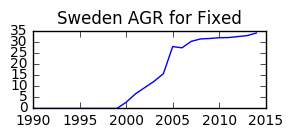

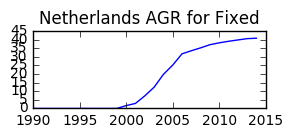

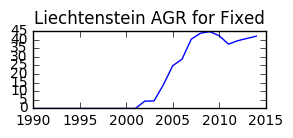

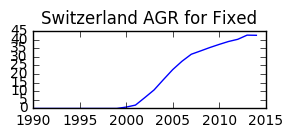

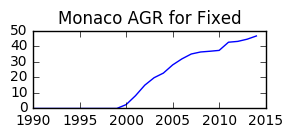

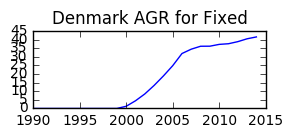

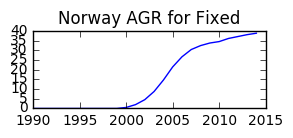

== Group 2 ================================


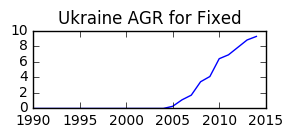

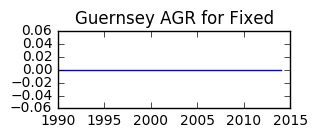

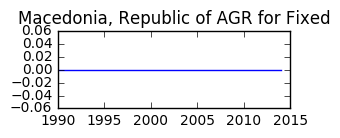

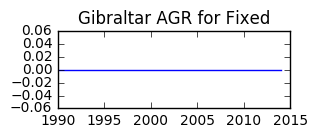

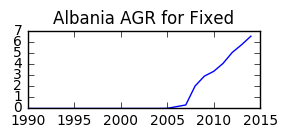

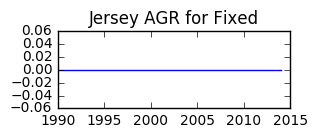

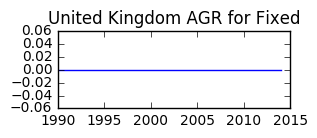

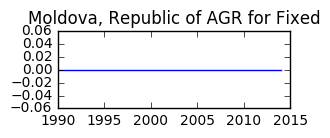

== Group 3 ================================


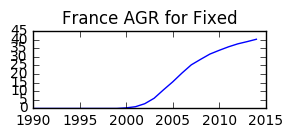

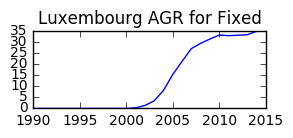

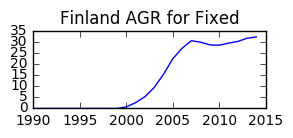

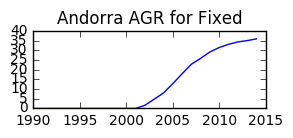

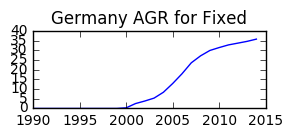

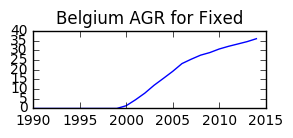

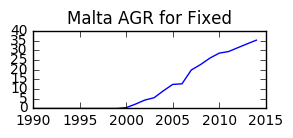

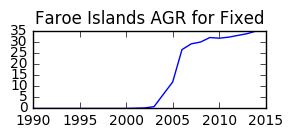

== Group 4 ================================


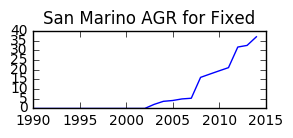

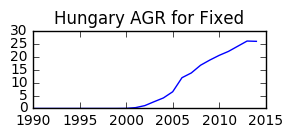

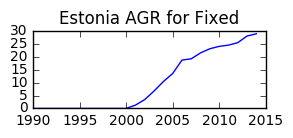

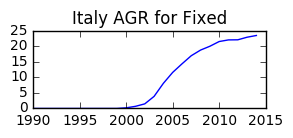

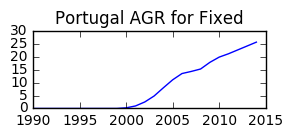

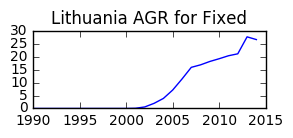

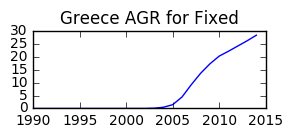

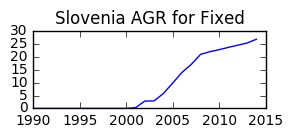

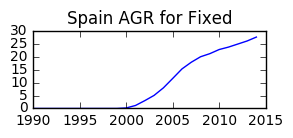

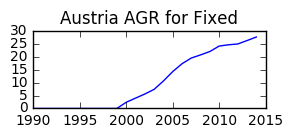

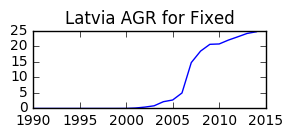

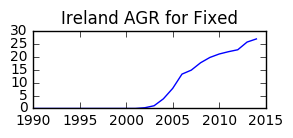

In [77]:
x = np.arange(years['min'], years['max'], 1);
for group in range(0,totGroups):
    print("== Group", group, "================================")
    for name in [row for row in mergedata if row[totColumns+1]==group]:
        y = countriesPlot[name[0]]

        plt.figure(figsize=(3,1))
        plt.title(name[0] + " AGR for Fixed")
        plt.plot(x, y)
        plt.show()     